In [381]:
import pandas as pd
import datetime
import numpy as np

import glob ,os
import datetime
import requests
from bs4 import BeautifulSoup as bs
import jpype
import glob
import time
import json
import path
import os
import warnings
warnings.filterwarnings(action='ignore')
from konlpy.tag import *
from wordcloud import WordCloud
from matplotlib import pyplot
from collections import Counter
import re
import nltk

### 데이터 불러오기

In [336]:
li=[]
for x in glob.glob(os.getcwd()+"\*.csv"):
    df=pd.read_csv(x,index_col=0)
    li+=[df]
total=pd.concat(li)

In [349]:
total2=total.reset_index(drop=True)

In [350]:
total3=total2.drop_duplicates().reset_index(drop=True)

### 인스타 보니 2018-12-13일 기준으로 입국하신듯하다 
#### 대한민국 시간대  utc+9
#### 캐나다 워털루 시간대 utc-5

In [351]:
total3['0'] =pd.to_datetime(total3['0'].str[:-5])

In [352]:
ko=total3.loc[total3['0'] >pd.to_datetime('2018-12-14')]
ca=total3.loc[total3['0'] <=pd.to_datetime('2018-12-14')]

ko['0'] =ko['0'] +datetime.timedelta(hours=9)
ca['0'] =ca['0'] -datetime.timedelta(hours=5)
total3=pd.concat([ko.reset_index(drop=True),ca.reset_index(drop=True)],axis=0)

C:\Users\ds\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\ds\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [353]:
total3

,1,2,0
0,"오늘은 Naver D2SF의 날.\n점심엔 D2 입주민들의 모임, 저녁엔 D2SF ...",좋아요 37개,2020-10-28 19:34:52
1,실제 세상에 쓰이는 AI를 만들고 싶지 않으신가요? 많은 돈이 허투루 쓰이고 있는 ...,좋아요 36개,2020-10-27 13:09:19
2,어렸을 땐 다들 삶의 목적이 지금은 안보이는 저 먼 꼭대기 위에 있다고 믿는 것 같...,좋아요 46개,2020-10-27 01:19:42
3,대학졸업사진... 풍운아처럼 학교를 다녔던 (사실 거의 안다녔던) 나는 시험이 언젠...,좋아요 50개,2020-10-25 19:10:41
4,"(조만간 자세한 공지 올리겠지만)\nART Lab에서 실력과 열정, 스마트함과 유쾌...",좋아요 22개,2020-10-25 00:17:04
...,...,...,...
270,It's my home office. I'm using a 43 inch monit...,좋아요 22개,2017-09-18 16:17:44
271,"There is a beatiful village on the Milne Dr., ...",좋아요 25개,2017-09-18 04:39:44
272,Get back to myself. Don't let one make mistake...,좋아요 29개,2017-09-18 00:49:23
273,"The place where you can go to church, hindu te...",좋아요 11개,2017-09-17 21:45:58


In [72]:
total3.to_csv("fi.csv",index=0)

# 모든데이터 출력

In [354]:
for v in range(len(total3)):
    print(total3['0'].values[v])
    print(total3['1'].values[v])
    print("ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")

2020-10-28T19:34:52.000000000
오늘은 Naver D2SF의 날.
점심엔 D2 입주민들의 모임, 저녁엔 D2SF 투자팀들 대표님들의 모임.

#ARTLab #아트랩 #NaverD2SF #창업
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
2020-10-27T13:09:19.000000000
실제 세상에 쓰이는 AI를 만들고 싶지 않으신가요? 많은 돈이 허투루 쓰이고 있는 낡은 뷰티산업을 인공지능 연구자들과 함께 혁신해 보지 않으실래요?
AI & Robotics Tech (ART)로 뷰티산업을 혁신하는 ART Lab에서 실력있고 열정 넘치는 인턴분들을 모십니다!

- 근무기간 : 2020.11 - 2020.1 총 3개월
- 급여 : 세전 250-450만원 (실력/경력에 따라 급여 결정)
- 근무장소 : 강남역오피스 / 군자역오피스 / 재택근무 선택

- 모집 분야 (총 3-5명 선발)
1) Vision 연구 개발
2) 데이터 수집 (크롤링+노가다+NLP)
3) Front-end 앱 개발
4) 마케터 (디지털마케팅)
5) 앱 디자이너

이번주부터 부지런히 모집 및 인터뷰를 시작해 11/6 이전에 모집과 선발을 마무리 지을 예정입니다. 조기 마감될 수 있으니 본인을 표현할 수 있는 자료를 모아 빠르게 이메일(contact@artlab.ai)로 지원 부탁드리겠습니다.

자세한 지원 방법은 아래의 웹페이지를 참고해주세요. 감사합니다! (아래 링크는 제 프로필에도 있습니다)
https://www.notion.so/artlab4u/ART-Lab-2020-11-06-e306811e41784d6fad3eed8adc96c53c

#ARTLab #아트랩 #인공지능 #스타트업 #채용 #구인 #구직 #취뽀 #인턴 #인턴십 #개발자 #데이터사이언티스트 #마케터 #디자이너
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
2020-10-27T01:19:42.000000000
어렸을 땐 다들 삶의 목적이 지금은 안보이

### 쭉읽어 보았다. 감성글과 사색글들이 많은편인 듯 하다.
### 기업운영과 연구 관련해서는 자신만의 철학을 가지고 계신듯 함

In [355]:
import matplotlib.pyplot as plt

In [357]:
df=total3.copy()
df.reset_index(drop=True)

,1,2,0
0,"오늘은 Naver D2SF의 날.\n점심엔 D2 입주민들의 모임, 저녁엔 D2SF ...",좋아요 37개,2020-10-28 19:34:52
1,실제 세상에 쓰이는 AI를 만들고 싶지 않으신가요? 많은 돈이 허투루 쓰이고 있는 ...,좋아요 36개,2020-10-27 13:09:19
2,어렸을 땐 다들 삶의 목적이 지금은 안보이는 저 먼 꼭대기 위에 있다고 믿는 것 같...,좋아요 46개,2020-10-27 01:19:42
3,대학졸업사진... 풍운아처럼 학교를 다녔던 (사실 거의 안다녔던) 나는 시험이 언젠...,좋아요 50개,2020-10-25 19:10:41
4,"(조만간 자세한 공지 올리겠지만)\nART Lab에서 실력과 열정, 스마트함과 유쾌...",좋아요 22개,2020-10-25 00:17:04
...,...,...,...
692,It's my home office. I'm using a 43 inch monit...,좋아요 22개,2017-09-18 16:17:44
693,"There is a beatiful village on the Milne Dr., ...",좋아요 25개,2017-09-18 04:39:44
694,Get back to myself. Don't let one make mistake...,좋아요 29개,2017-09-18 00:49:23
695,"The place where you can go to church, hindu te...",좋아요 11개,2017-09-17 21:45:58


In [358]:
df['year'] =df['0'].dt.year
df['week_of_days'] =df['0'].dt.weekofyear
df['days'] =df['0'].dt.weekday

C:\Users\ds\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [359]:
df['y-m'] = pd.to_datetime(df['year'].astype("str")+"-"+df['0'].dt.month.astype("str")+"-01")

In [360]:
j=df.groupby(['y-m','week_of_days']).count().reset_index()[['y-m','0']]
j['y-m'] = j['y-m'].astype("str").str[:7]

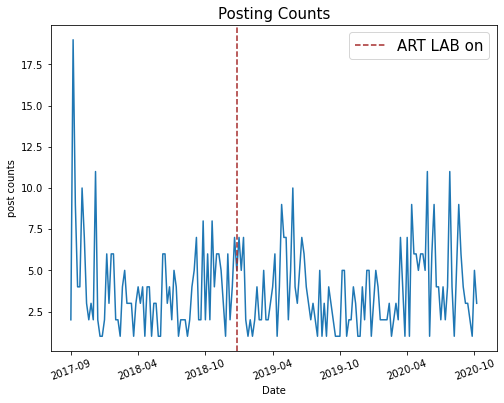

In [361]:
plt.figure(figsize=(8,6))
plt.plot(j['0'])
plt.xticks(range(0,len(j),30),[j['y-m'].values[x] for x in range(0,len(j),30)],rotation=20)
plt.ylabel("post counts")
plt.xlabel("Date")
plt.axvline(x=74,c='brown',ls='--',label='ART LAB on')
plt.legend(prop={'size': 15})
plt.title("Posting Counts",fontsize=15)
plt.show()

## 창업전 후 포스트 개수의 경향이 크게 다르지 않아보인다

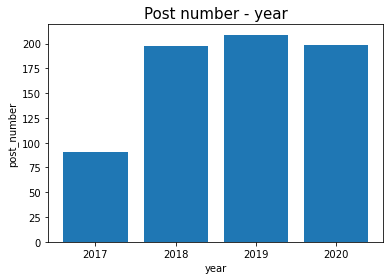

In [362]:
plt.title("Post number - year",fontsize=15)
plt.bar(np.arange(4),df.year.value_counts().sort_index())
plt.xticks(np.arange(4),['2017','2018','2019','2020'])
plt.xlabel('year')
plt.ylabel('post_number')
plt.show()


### 2020년은 아직 끝나지 않았는데 2019년 추월예정

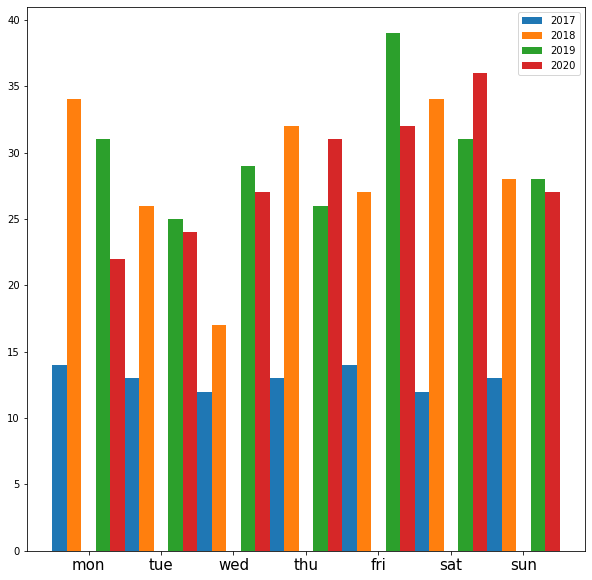

In [364]:
swich =0.2
plt.figure(figsize=(10,10))
plt.bar(np.arange(7)-2*swich,gy.xs(2017).values.reshape(-1),label='2017',width=swich)
plt.bar(np.arange(7)-swich,gy.xs(2018).values.reshape(-1),label='2018',width=swich)
plt.bar(np.arange(7)+swich,gy.xs(2019).values.reshape(-1),label='2019',width=swich)
plt.bar(np.arange(7)+2*swich,gy.xs(2020).values.reshape(-1),label='2020',width=swich)
plt.xticks(np.arange(7),['mon','tue','wed','thu','fri','sat','sun'],fontsize=15)
plt.legend()

#### 19년에는 금요일,월요일에 가장 많이 업로드 -> 업무 시작과 끝 -> 업무 더 중시?
#### 20년에는 토요일에 가장 많이 업로드 -> 휴식을 강조..?



In [365]:
df['hours'] =df['0'].dt.hour

In [366]:
import seaborn as sns

In [367]:
hour_data = df.groupby(['year','hours']).count()['0'].to_frame()

In [373]:
dic_7 =hour_data.xs(2017).to_dict()
dic_7['0'][5]=0
dic_7['0'][17]=0
dic_9 =hour_data.xs(2019).to_dict()
dic_9['0'][6]=0

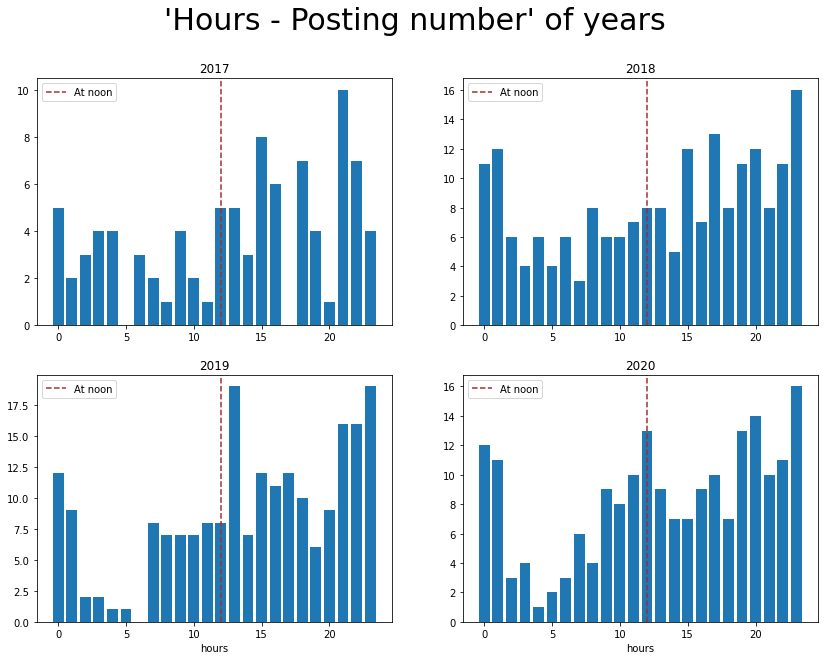

In [380]:
fig, axs = plt.subplots(2, 2,figsize=(14,10))
fig.suptitle("'Hours - Posting number' of years",fontsize=30)

axs[0, 0].bar(range(24),pd.DataFrame(dic_7).values.reshape(-1))
axs[0, 0].axvline(x=12,c='brown',ls='--',label="At noon")
axs[0, 0].legend()
axs[0, 0].set_title('2017')
axs[0, 1].bar(range(24),hour_data.xs(2018).values.reshape(-1))
axs[0, 1].axvline(x=12,c='brown',ls='--',label="At noon")
axs[0, 1].legend()
axs[0, 1].set_title('2018')
axs[1, 0].bar(range(24),pd.DataFrame(dic_9).values.reshape(-1))
axs[1, 0].axvline(x=12,c='brown',ls='--',label="At noon")
axs[1, 0].legend()
axs[1, 0].set_title('2019')
axs[1, 1].bar(range(24),hour_data.xs(2020).values.reshape(-1))
axs[1, 1].axvline(x=12,c='brown',ls='--',label="At noon")
axs[1, 1].legend()
axs[1, 1].set_title('2020')
axs[1,1].set_xlabel("hours")
axs[1,0].set_xlabel("hours")
plt.show()

#### 2018년의 경우 학위 과정중이셨던것같은데 새벽대의 글을 많이쓰셨다 ㄷㄷ
#### 2019년에는 art lab시작이 되었고, 한국에서 활동을 하셨다 새벽시간대에 눈에 띄게 포스팅수가 적어지심
#### 일과시간의경우 12시~13시와 23시에 피크를 찍은것을 볼수있다

In [382]:
total3

,1,2,0
0,"오늘은 Naver D2SF의 날.\n점심엔 D2 입주민들의 모임, 저녁엔 D2SF ...",좋아요 37개,2020-10-28 19:34:52
1,실제 세상에 쓰이는 AI를 만들고 싶지 않으신가요? 많은 돈이 허투루 쓰이고 있는 ...,좋아요 36개,2020-10-27 13:09:19
2,어렸을 땐 다들 삶의 목적이 지금은 안보이는 저 먼 꼭대기 위에 있다고 믿는 것 같...,좋아요 46개,2020-10-27 01:19:42
3,대학졸업사진... 풍운아처럼 학교를 다녔던 (사실 거의 안다녔던) 나는 시험이 언젠...,좋아요 50개,2020-10-25 19:10:41
4,"(조만간 자세한 공지 올리겠지만)\nART Lab에서 실력과 열정, 스마트함과 유쾌...",좋아요 22개,2020-10-25 00:17:04
...,...,...,...
270,It's my home office. I'm using a 43 inch monit...,좋아요 22개,2017-09-18 16:17:44
271,"There is a beatiful village on the Milne Dr., ...",좋아요 25개,2017-09-18 04:39:44
272,Get back to myself. Don't let one make mistake...,좋아요 29개,2017-09-18 00:49:23
273,"The place where you can go to church, hindu te...",좋아요 11개,2017-09-17 21:45:58


In [454]:
def get_each_apply2(save_name,df,c,max_size):
    df_loc = df
    tokens = [ t for d in df_loc[c] for t in d]
    words = []
    for n in tokens:
        if len(n) > 1:
            words.append(n)

    count = Counter(words)
    most = count.most_common(100)
    del_list=['']
    d=[]
    for w in most:
        if w[0] in del_list:
            d+=[w]
    for ww in d:   
        most.remove(ww)
    tags = {}
    for n, c in most:
        tags[n] = c    
    wc = WordCloud(background_color='black', font_path="배민 보통.ttf", width=700, height=500,
                    scale=2.0, max_font_size=max_size,colormap='Pastel1')
    
    gen = wc.generate_from_frequencies(tags)
    wc.to_file(str(datetime.datetime.now()).split(".")[0].replace(" ","_").replace(":","_")+"_"+save_name+'.png')
    pyplot.figure(figsize=(10,8))
    pyplot.imshow(gen, interpolation='bilinear')
    pyplot.axis("off")


    
twitter = Twitter()
okt = Okt()

def tokenizer_twitter_morphs(doc):
    return twitter.morphs(doc)

def tokenizer_okt_noun(doc):
    return okt.nouns(doc)

def tokenizer_twitter_pos(doc):
    return twitter.pos(doc, norm=True, stem=True)

In [405]:
t4= total3.reset_index(drop=True)

In [406]:
df_total=t4.copy()

In [407]:
df_total.head()

,1,2,0
0,"오늘은 Naver D2SF의 날.\n점심엔 D2 입주민들의 모임, 저녁엔 D2SF ...",좋아요 37개,2020-10-28 19:34:52
1,실제 세상에 쓰이는 AI를 만들고 싶지 않으신가요? 많은 돈이 허투루 쓰이고 있는 ...,좋아요 36개,2020-10-27 13:09:19
2,어렸을 땐 다들 삶의 목적이 지금은 안보이는 저 먼 꼭대기 위에 있다고 믿는 것 같...,좋아요 46개,2020-10-27 01:19:42
3,대학졸업사진... 풍운아처럼 학교를 다녔던 (사실 거의 안다녔던) 나는 시험이 언젠...,좋아요 50개,2020-10-25 19:10:41
4,"(조만간 자세한 공지 올리겠지만)\nART Lab에서 실력과 열정, 스마트함과 유쾌...",좋아요 22개,2020-10-25 00:17:04


In [410]:
df_total

,1,2,0
0,"오늘은 Naver D2SF의 날.\n점심엔 D2 입주민들의 모임, 저녁엔 D2SF ...",좋아요 37개,2020-10-28 19:34:52
1,실제 세상에 쓰이는 AI를 만들고 싶지 않으신가요? 많은 돈이 허투루 쓰이고 있는 ...,좋아요 36개,2020-10-27 13:09:19
2,어렸을 땐 다들 삶의 목적이 지금은 안보이는 저 먼 꼭대기 위에 있다고 믿는 것 같...,좋아요 46개,2020-10-27 01:19:42
3,대학졸업사진... 풍운아처럼 학교를 다녔던 (사실 거의 안다녔던) 나는 시험이 언젠...,좋아요 50개,2020-10-25 19:10:41
4,"(조만간 자세한 공지 올리겠지만)\nART Lab에서 실력과 열정, 스마트함과 유쾌...",좋아요 22개,2020-10-25 00:17:04
...,...,...,...
692,It's my home office. I'm using a 43 inch monit...,좋아요 22개,2017-09-18 16:17:44
693,"There is a beatiful village on the Milne Dr., ...",좋아요 25개,2017-09-18 04:39:44
694,Get back to myself. Don't let one make mistake...,좋아요 29개,2017-09-18 00:49:23
695,"The place where you can go to church, hindu te...",좋아요 11개,2017-09-17 21:45:58


In [411]:

df_total['comments_okt_nouns'] = df_total['1'].apply(tokenizer_okt_noun)

# df_total['comments_okt_nouns'] += df_total['comments'].apply(sum_another_words)

# wordcloud

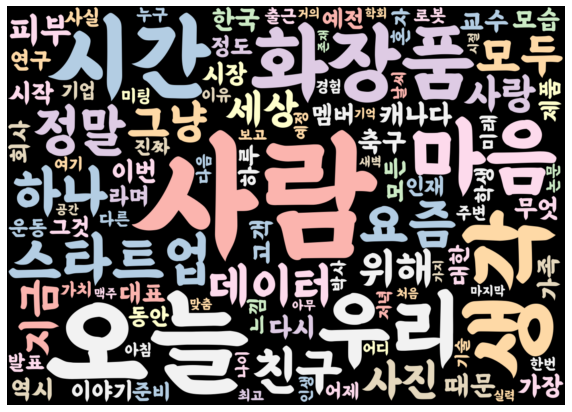

In [412]:
get_each_apply2('terr',df_total)

#### 사람, 마음, 오늘, 화장품, 시간, 우리 순서

## '사람'포함 글들

In [461]:
[print(x.replace("\n","")+"\n") for x in df_total.loc[df_total['1'].str.contains('사람')]['1'].tolist()]

모든 것이 불확실한 스타트업이지만 ART Lab엔 딱 한가지 확실한 것이 있다: 정말 좋은 사람들이 모였고 우린 서로 가장 좋은 친구다.일과 삶의 경계가 없는 스타트업에서 다행히 우리가 일적으로나 삶적으로나 가장 좋은 친구들이어서 참 좋은듯... 해피버스데이 제이!#ARTLab #아트랩 #인공지능 #스타트업 #NaverD2SF 

"주변에 선한 영향력을 주는 사람이 되고싶다"이런 꿈을 이야기 하는 사람들이 많다. 나도 그 중 한명이었다. 소박하면서도 정답에 가까운 이야기라고 생각한 적도 있었다.하지만 요즘엔 이게 과연 잘 정의된 꿈인지 모르겠다. '주변', '선한', '영향력' 모두 정의내리기 쉽지않다.'주변'이란 무엇인가? 가족? 친구? 회사동료? 아님 온/오프라인으로 소통이 닿는 사람들까지?'선함'이란 무엇인가? 내가 생각하는 '선'은 내 주변에서도 '선'으로 받아들여지고 있는가?'영향'이란 무엇인가? 과연 사람들은 영향을 받고싶어 하는가? '선함'의 정의가 다른 '주변'에 '영향'을 주는 행위는 매우 위험한 행위일 수 있지 않을까?어쩌면 시대가 바꼈다는 생각이 든다.예전엔 공통의 상식(common sense)이 존재 했고, 공동체의 진보와 개인의 계몽을 위해 선각자의 지혜를 나누고 가진자의 자비를 나누는 일이 필요했다면,요즘엔 각자가 말하는 상식이 다르고 (심지어 모순되는 주장 모두가 탄탄한 논리구조/세뇌구조를 가지고 있고), 따라서 주변의 정의가 시공간이 아닌 같은 사상을 공유하는 사람들의 집합을 일컬을 수 있으며, 이러한 환경에서 목소리가 닿는 주변에 일방적인 영향을 주는 것은 오히려 팽팽한 평행선 같은 갈등만 야기할 가능성이 높은 것 같다.그래서 요즘은 '주변에 선한 영향력을 끼치는 사람이 되자'가 아니라 '너 혼자 개념챙기고 조용히 살아라'가 덕목이 되는 시대가 되어버렸지 않은가 싶다.요즘은 내가 가진 생각을 공유하기가 쉽지 않다. 어쩌면 페이스북이 이젠 시대착오적인 소셜미디어가 되지 않았나싶은 생각도 든다. 이 플랫폼에 존재하는 '주변'과 '선함

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

'나를 떠났던 사람들이 모두 현명했었는지도 몰라. ' ....?
무슨사연이..

긴글들을 많이쓰신편, 읽어보니 어떤길을 걸어오셨구나 느껴진다

### '마음' 포함글들

In [462]:
[print(x.replace("\n","")+"\n") for x in df_total.loc[df_total['1'].str.contains('마음')]['1'].tolist()]

어렸을 땐 다들 삶의 목적이 지금은 안보이는 저 먼 꼭대기 위에 있다고 믿는 것 같다. 그래서 다들 열심히 정상을 향해 오르나 보다. 하지만 나중엔 알게된다. 내 삶의 목적은 꼭대기가 아니라 늘 내 곁에 있었다. 지금도 답은 오르는데 있는 것이 아니라, 삶을 다르게 바라보는 마음에 있다. 

"주변에 선한 영향력을 주는 사람이 되고싶다"이런 꿈을 이야기 하는 사람들이 많다. 나도 그 중 한명이었다. 소박하면서도 정답에 가까운 이야기라고 생각한 적도 있었다.하지만 요즘엔 이게 과연 잘 정의된 꿈인지 모르겠다. '주변', '선한', '영향력' 모두 정의내리기 쉽지않다.'주변'이란 무엇인가? 가족? 친구? 회사동료? 아님 온/오프라인으로 소통이 닿는 사람들까지?'선함'이란 무엇인가? 내가 생각하는 '선'은 내 주변에서도 '선'으로 받아들여지고 있는가?'영향'이란 무엇인가? 과연 사람들은 영향을 받고싶어 하는가? '선함'의 정의가 다른 '주변'에 '영향'을 주는 행위는 매우 위험한 행위일 수 있지 않을까?어쩌면 시대가 바꼈다는 생각이 든다.예전엔 공통의 상식(common sense)이 존재 했고, 공동체의 진보와 개인의 계몽을 위해 선각자의 지혜를 나누고 가진자의 자비를 나누는 일이 필요했다면,요즘엔 각자가 말하는 상식이 다르고 (심지어 모순되는 주장 모두가 탄탄한 논리구조/세뇌구조를 가지고 있고), 따라서 주변의 정의가 시공간이 아닌 같은 사상을 공유하는 사람들의 집합을 일컬을 수 있으며, 이러한 환경에서 목소리가 닿는 주변에 일방적인 영향을 주는 것은 오히려 팽팽한 평행선 같은 갈등만 야기할 가능성이 높은 것 같다.그래서 요즘은 '주변에 선한 영향력을 끼치는 사람이 되자'가 아니라 '너 혼자 개념챙기고 조용히 살아라'가 덕목이 되는 시대가 되어버렸지 않은가 싶다.요즘은 내가 가진 생각을 공유하기가 쉽지 않다. 어쩌면 페이스북이 이젠 시대착오적인 소셜미디어가 되지 않았나싶은 생각도 든다. 이 플랫폼에 존재하는 '주변'과 '선함'과 '영향'에 대해 회의감이 든다.가끔

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

#### 해쉬태크들만 따로 모아서 워드크라우드 작업을 해준다

In [417]:
df_total['1'].values[0]

'오늘은 Naver D2SF의 날.\n점심엔 D2 입주민들의 모임, 저녁엔 D2SF 투자팀들 대표님들의 모임.\n\n#ARTLab #아트랩 #NaverD2SF #창업'

In [419]:
#해쉬태크 구분을 위해 마지막 띄어쓰기 추가
df_total['1'] =df_total['1']+' '

In [449]:
def fillter_hash(x):
    p = re.compile('#\w{1,}\s')
    total=p.findall(x)
    value = [w.strip().replace("#",'') for w in total]
    return value   

In [450]:
df_total['hash'] =df_total['1'].apply(fillter_hash)

In [451]:
df_total

,1,2,0,comments_okt_nouns,hash
0,"오늘은 Naver D2SF의 날.\n점심엔 D2 입주민들의 모임, 저녁엔 D2SF ...",좋아요 37개,2020-10-28 19:34:52,"[오늘, 의, 날, 점심, 입, 주민, 모임, 저녁, 투자, 팀, 대표, 모임]","[ARTLab, 아트랩, NaverD2SF, 창업]"
1,실제 세상에 쓰이는 AI를 만들고 싶지 않으신가요? 많은 돈이 허투루 쓰이고 있는 ...,좋아요 36개,2020-10-27 13:09:19,"[실제, 세상, 를, 가요, 돈, 허투루, 뷰티, 산업, 인공, 지능, 연구자, 혁...","[ARTLab, 아트랩, 인공지능, 스타트업, 채용, 구인, 구직, 취뽀, 인턴, ..."
2,어렸을 땐 다들 삶의 목적이 지금은 안보이는 저 먼 꼭대기 위에 있다고 믿는 것 같...,좋아요 46개,2020-10-27 01:19:42,"[땐, 삶, 목적, 지금, 저, 꼭대기, 위, 것, 정상, 향, 나중, 알, 내, ...",[]
3,대학졸업사진... 풍운아처럼 학교를 다녔던 (사실 거의 안다녔던) 나는 시험이 언젠...,좋아요 50개,2020-10-25 19:10:41,"[대학, 졸업사진, 풍운아, 학교, 사실, 거의, 나, 시험, 젠, 지도, 만, 학...",[]
4,"(조만간 자세한 공지 올리겠지만)\nART Lab에서 실력과 열정, 스마트함과 유쾌...",좋아요 22개,2020-10-25 00:17:04,"[조만간, 공지, 실력, 열정, 스마트, 함, 분, 개월, 인턴, 모집, 분야, 웹...","[ARTLab, 아트랩, 인공지능, 스타트업, 창업, 인턴십]"
...,...,...,...,...,...
692,It's my home office. I'm using a 43 inch monit...,좋아요 22개,2017-09-18 16:17:44,"[것, 것, 공부, 짓, 시간, 훌쩍, 걸, 싹, 인터넷, 선도, 맘, 공부, 공부...","[waterloo, kitchener, 워터루, 워털루, 키치너, 토론토, 캐나다]"
693,"There is a beatiful village on the Milne Dr., ...",좋아요 25개,2017-09-18 04:39:44,[],"[waterloo, kitchener, 워터루, 워털루, 키치너, 토론토, 캐나다]"
694,Get back to myself. Don't let one make mistake...,좋아요 29개,2017-09-18 00:49:23,[],"[waterloo, kitchener, 워터루, 워털루, 키치너, 토론토, 캐나다]"
695,"The place where you can go to church, hindu te...",좋아요 11개,2017-09-17 21:45:58,[],"[waterloo, kitchener, 워터루, 워털루, 키치너, 토론토, 캐나다]"


# 해쉬 태크 wordcloud

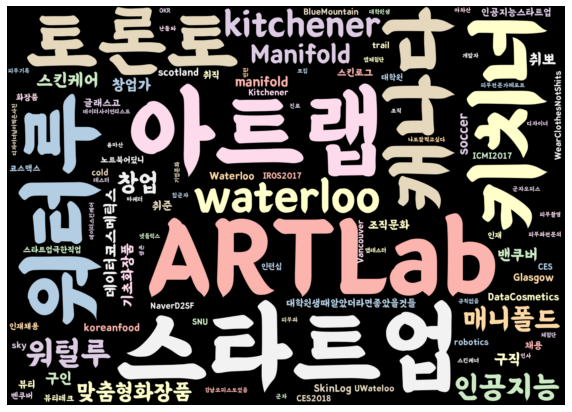

In [464]:
get_each_apply2('terr',df_total,'hash',130)